In [8]:
!pip install pandas 
!pip install numpy 
!pip install scikit-learn 
!pip install seaborn 

  Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl.metadata (13 kB)
  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl (44.5 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.54.1-cp312-cp312-win_amd64.whl.metadata (167 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-10.4.0-cp312-cp312-win_amd6

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
import re
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt 

In [10]:
df = pd.read_csv('train.csv')
df = df.drop_duplicates(keep='first')

encoder = LabelEncoder()
df['IS_Response'] = encoder.fit_transform(df['Is_Response'])

df.drop(columns=['User_ID','Browser_Used','Device_Used'], inplace=True)

In [11]:
def get_importantFeatures(sent):
    sent = sent.lower()
    sent = re.sub('\W+',' ', sent)
    return sent

df['imp_features'] = df['Description'].apply(get_importantFeatures)

x = df['imp_features']
y = df['IS_Response']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=100)

vector = CountVectorizer()
xv = svm.SVC()

model = Pipeline([('vectorizer',vector),('classifier',xv)])
model.fit(x_train,y_train)

pred = model.predict(x_test)

<>:3: SyntaxWarning: invalid escape sequence '\W'
<>:3: SyntaxWarning: invalid escape sequence '\W'
C:\Users\Akshay\AppData\Local\Temp\ipykernel_23084\2958137018.py:3: SyntaxWarning: invalid escape sequence '\W'
  sent = re.sub('\W+',' ', sent)


0.8693105928285215


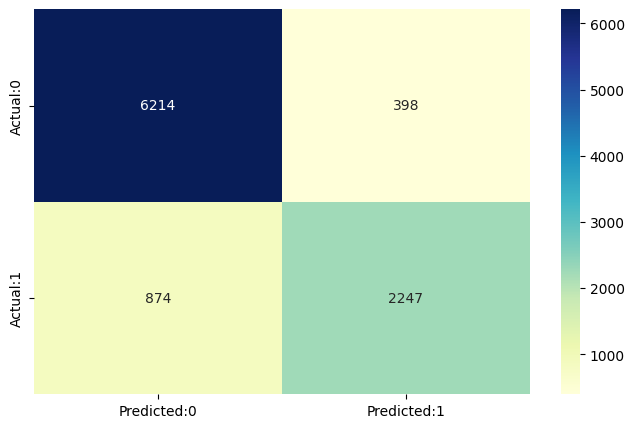

In [13]:
cm=confusion_matrix(y_test,pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))

sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

print(accuracy_score(y_test,pred))